In [ ]:
import os
import numpy as np
import matplotlib
import torch

import matplotlib.pyplot as plt
import csv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
from torchvision import transforms, utils
import time
import pandas as pd
import scipy.io
import sklearn.metrics
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)

from scipy import signal

from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from torch.autograd import Variable





In [ ]:
class Net2_stft(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_stft,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 200
        n3 = 100
        n4 = 50
        n5=50
        n_l1=7200
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, 5)
        self.bn1 = nn.BatchNorm2d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv2d(n1, n2, 3)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, 2,2)
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm2d(n4)
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
       


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

class Net2_stft2(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_stft2,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 200
        n3 = 100
        n4 = 50
    
        n_l1=3200
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, 5)
        self.bn1 = nn.BatchNorm2d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv2d(n1, n2, 3)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, 2,2)
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm2d(n4)
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
       


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x


class Net2_cwt(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_cwt,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 100
        n3 = 50
        n4 = 50
       
 
        n_l1=4200
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, (5, 3),2)
        self.bn1 = nn.BatchNorm2d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv2d(n1, n2, (5, 3),2)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, (5, 2))
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, (5, 2))
        self.bn4 = nn.BatchNorm2d(n4)
        # self.conv5 = nn.Conv2d(n4, n5, 2)
        # self.bn5 = nn.BatchNorm2d(n5)
     
        
        self.fc1 = nn.Linear(n_l1, n_l2)
       
   
        self.fc2 = nn.Linear(n_l2, num_classes)
      
        


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

# 1D CNN
class Net(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net,self).__init__()
        
        n1 = 128 # This directly affects accuracy if value is low.
        n2 = 128
        n3 = 64
        n4 = 64
        
        n_l1=4544
        n_l2=200
       
        n_out =8   # output channel  (classification)
        oc = 2
        self.conv1 = nn.Conv1d(in_channels, n1, 100, 4)
        self.bn1 = nn.BatchNorm1d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(n1, n2, 25,2)
        self.bn2 = nn.BatchNorm1d(n2)
        self.conv3 = nn.Conv1d(n2, n3, 5,2)
        self.bn3 = nn.BatchNorm1d(n3)
        self.conv4 = nn.Conv1d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm1d(n4)
        # self.conv5 = nn.Conv1d(n4, n5, 2,2)
        # self.bn5 = nn.BatchNorm1d(n5)
        #self.pool1=nn.AvgPool1d(2)
        #self.pool2=nn.MaxPool1d(2)
        
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
        


    def forward(self, x):
    
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

In [ ]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).cuda()  #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).cuda()  #internal state
        # Propagate input through LSTM
        #print(x.shape)
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        #print(hn.shape)
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        #print(out.shape)
        return out


In [ ]:
!pip install mat73
import mat73
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
# file_name_train=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/Data_allfilt_0.5_7.mat"
# file_name_train=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/17g_6g_1p_1_24/Data_17_6_combfilt_0.1_5.mat"

# data = mat73.loadmat(file_name_train)


# feature_all = data['feature_all'][:,:,:]    ## waveform * channel * case 
# feature_all=np.swapaxes(feature_all,0,2)
# self_channel=[0,1,10,11,20,21,30,31]


# label_all = data['label_all']
# caseNum_all = data['caseNum_all']

# Chan_Name = data['Chan_Name']



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
ProjFolder='AirDrawRMG'
MatDataName='Data_comb'# import from MAT feat_all 
FiltName='filt_0.05_10'
ExpVer='p2_v1'
#FiltName='filt_0.1_5'
# FiltName='filt_0.05_15'
file_name_data=r"/content/drive/My Drive/Colab Notebooks/"+ProjFolder+"/data/"+ExpVer+"/multi_2D_cwt"+MatDataName+FiltName+".npz"
data=np.load(file_name_data)

feature_2d_cwt=data['feature_2d_cwt']
feature_2d_cwt2=data['feature_2d_cwt2']
feature_2d_cwt3=data['feature_2d_cwt3']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# data=np.load("/content/drive/My Drive/Colab Notebooks/RFMG/data/17g_6g_1p_1_24/data_all_multi4.npz")
feature_2d_stft=data['feature_2d_stft']
feature_2d_stft2=data['feature_2d_stft2']
label_all=data['label_all']
caseNum_all=data['caseNum_all']
feature_all=data['feature_all']
# ,feature_all=feature_all,\
#                     feature_2d_stft=feature_2d_stft,feature_2d_stft2=feature_2d_stft2,\
#                     feature_2d_cwt=feature_2d_cwt,\
#                     label_all=label_all,caseNum_all=caseNum_all

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#X=feature_2d_stft;
X=feature_2d_cwt2[:,:32,:,:];
#X=feature_all[:,:32,:];
y=label_all;
#reshaping to rows, timestamps, features
# X = np.swapaxes(X,1,2)
# #X = np.swapaxes(X,1,3)
# X = np.reshape(X,   (X.shape[0],  X.shape[1],-1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8,stratify=y)


print(X_train.shape)

print(y_test.shape)

(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)
f_size=1;
input_size = 32*f_size #number of features
hidden_size = 100 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 26 #number of output classes 
in_ch=32


(436, 32, 125, 30)
(110,)
[[ 0.  4.]
 [ 1.  4.]
 [ 2.  4.]
 [ 3.  5.]
 [ 4.  4.]
 [ 5.  5.]
 [ 6.  4.]
 [ 7.  4.]
 [ 8.  5.]
 [ 9.  5.]
 [10.  4.]
 [11.  4.]
 [12.  4.]
 [13.  4.]
 [14.  4.]
 [15.  4.]
 [16.  4.]
 [17.  5.]
 [18.  4.]
 [19.  4.]
 [20.  5.]
 [21.  4.]
 [22.  4.]
 [23.  4.]
 [24.  4.]
 [25.  4.]]


0.1812773341432624
0.12052391442385586
0.006493955683988442
0.022659251229329543
0.00032845047118842876
0.016496176611293444
0.0001101343320584386
0.01446152999997139
7.392502688362751e-05
0.012236164577982642
2.9610838741598086e-05
0.011449475857344541
5.832257077958725e-05
0.016267248514023693
3.289901482225972e-05
0.015756970406933263
0.0198976406827569
0.051944047551263466
0.0032598609270297263
0.030990088256922635
0.00022392588896664081
0.031432930278507146
4.2394599078945097e-05
0.030729957195845516
2.1926674710586934e-05
0.03041531213305213
total training time is 21.042177200317383


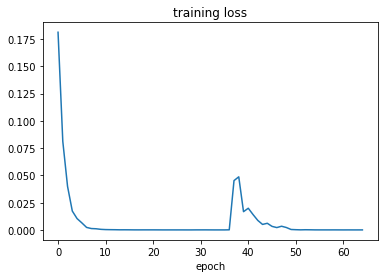

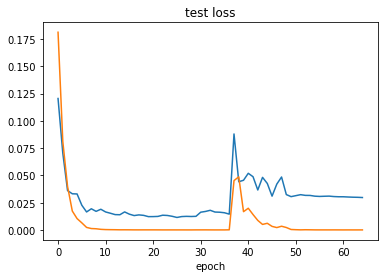

In [39]:
import torch
torch.cuda.empty_cache()
if __name__ == '__main__':
    
    
    batchsize_train = 16

    train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=batchsize_train,shuffle=True)
    batchsize_test = 16
    test_loader = DataLoader(TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test)), batch_size=batchsize_test, shuffle=False)
            
    
    #hyperparameter definition    
    learning_rate = 0.001
    
    momentum = 0.1
    random_seed=1
    torch.backends.cudnn.enabled = False
    torch.manual_seed(random_seed)     #设定随机数种子为固定值
    
    
    train_loss_epoch = []
    test_acc_epoch =[]
    total_acc_epoch = []
    #epoch_range = np.arange(25,225,25)
    epoch_range = np.array([2])

  
    # lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train.shape[1])
    network = Net2_cwt(in_ch,26).cuda()
    # network = lstm1.cuda()   # 1d cnn

    
    #training
    optimizer = optim.Adam(network.parameters(), lr=learning_rate)
    #optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)
    

    #network.train()
    Training_Loss = []
    Test_Loss = []
    start_time = time.time()
    criterion = nn.CrossEntropyLoss()
    #criterion = nn.CrossEntropyLoss(weight=torch.Tensor([1, 3]).cuda())
    for epoch in range(65):   # loop over the dataset multiple times
        train_loss = 0
        for X, Y in train_loader:
            # X = X.view(-1,1,X.shape[2],X.shape[3]).cuda()
            X = X.float().cuda()  
            Y = Y.long().view(-1, ).cuda() 
            current_batchsize = X.shape[0]
            optimizer.zero_grad()
            output = network(X)
            loss = criterion(output,Y)
            train_loss = train_loss + loss.item()
            loss.backward()                     #calculate the gradient decent
            optimizer.step()                    #update the weight
            
          





        test_loss = 0
        correct = 0
        total = 0
        test_y= []
        test_y_p = []
        # sens = 0    # sensitivity = TP/(TP + FN)
        # prec = 0    # precision = TP/(TP + FP)
        with torch.no_grad():        
            # X = X.view(-1,X.shape[1],X.shape[2])
            # X = X.float()         
            for X, Y in test_loader:
                X = torch.Tensor(X).cuda()
                Y = torch.Tensor(Y).long().view(-1, ).cuda()
                images, labels = X, Y
                # calculate outputs by running images through the network
                outputs = network(images)
                loss = criterion(outputs,Y)
                test_loss = test_loss + loss.item()

                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                for i in range(len(labels)):
                  test_y.append(labels[i])
                  test_y_p.append(predicted[i])
        
        #print('Accuracy of test cases: %d %%' % (100 * correct / total))
 

        Training_Loss.append(train_loss/len(train_loader.dataset))
        Test_Loss.append(test_loss/len(test_loader.dataset))
        if epoch%5==0:
            print(train_loss/len(train_loader.dataset))
            print(test_loss/len(test_loader.dataset))
      
            

    
    train_loss_epoch.append(Training_Loss[-1])
    training_time=time.time()-start_time
    print('total training time is',training_time)
    
    plt.figure()
    plt.plot(Training_Loss)
    plt.title("training loss")
    plt.xlabel("epoch")
    plt.show()

    plt.figure()
    plt.plot(Test_Loss)
    plt.title("test loss")
    plt.xlabel("epoch")
    plt.plot(Training_Loss)
    plt.show()



In [40]:
from sklearn.metrics import confusion_matrix
import scipy.io
import seaborn as sn
import pandas as pd
test_y_p=torch.FloatTensor(test_y_p)
test_y=torch.FloatTensor(test_y)
y_p=np.array(test_y_p.cpu())
y=np.array(test_y.cpu())




cm=confusion_matrix(y, y_p)
acc=accuracy_score(y, y_p)
print(cm,acc)

[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 

In [43]:
# in_ch: CNN input channel number 
# num_class: classification number  8,5,3 
# opt CV method. groupKfold: kfold, all cases not been seen in training set  
# Kfold : randomly kfold. label and cases equally distributed
# group: leave one case out 
    
def kFCV(X_all,y_all,opt,case):

    X_all = np.swapaxes(X_all,1,3)
    X_all = np.reshape(X_all,   (X_all.shape[0],  X_all.shape[1],-1))
    


    #rkf_group=StratifiedGroupKFold(n_splits=5)
    cm_all=[]
    acc_all=[]
    
    case=case.flatten()
    if opt=='groupKfold':
        folds=StratifiedGroupKFold(n_splits=5).split(X_all,y_all,case)
    if opt=='Kfold':
        folds=RepeatedStratifiedKFold(n_splits=5, n_repeats=1,random_state=0).split(X_all,case)
    if opt=='group':  
        logo = LeaveOneGroupOut()
        logo.get_n_splits(X_all,y_all,case)
        logo.get_n_splits(groups=case) 
        folds=logo.split(X_all,y_all,case)

    for train_ind, test_ind in folds:
           
       
        X_train=X_all[train_ind] 
        X_test=X_all[test_ind]
        y_train=y_all[train_ind] 
        y_test=y_all[test_ind]
        
        # (unique, counts) = np.unique(caseNum_all[test_ind], return_counts=True)
        # frequencies = np.asarray((unique, counts)).T
        # print(frequencies)

        batchsize_train = 16
        train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=batchsize_train,shuffle=True)
        batchsize_test = 16
        test_loader = DataLoader(TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test)), batch_size=batchsize_test, shuffle=False)
                
        
        n_epoch=60
        learning_rate = 1e-3  #学习的速率 越小越精细
        momentum = 0.1
        random_seed=1
        torch.backends.cudnn.enabled = False
        torch.manual_seed(random_seed)     #设定随机数种子为固定值
        
        train_loss_epoch = []
        test_acc_epoch =[]
        total_acc_epoch = []
        #epoch_range = np.arange(25,225,25)
        epoch_range = np.array([2])

        
        # lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train.shape[1])
        # network = lstm1.cuda()   
        network = Net2_cwt(in_ch,26).cuda()
        
        #training
        optimizer = optim.Adam(network.parameters(), lr=learning_rate)
        
        
        
        #network.train()
        Training_Loss = []
        Test_Loss = []
        start_time = time.time()
        criterion = nn.CrossEntropyLoss()
        for epoch in range(n_epoch):   # loop over the dataset multiple times
            train_loss = 0
            for X, Y in train_loader:
                
                X = X.float().cuda()  
                Y = Y.long().view(-1, ).cuda() 
                current_batchsize = X.shape[0]
                optimizer.zero_grad()
                output = network(X)
                loss = criterion(output,Y)
                train_loss = train_loss + loss.item()
                loss.backward()                     #calculate the gradient decent
                optimizer.step()                    #update the weight
                

            test_loss = 0
            correct = 0
            total = 0
            test_y= []
            test_y_p = []
            # sens = 0    # sensitivity = TP/(TP + FN)
            # prec = 0    # precision = TP/(TP + FP)
            with torch.no_grad():        
                # X = X.view(-1,X.shape[1],X.shape[2])
                # X = X.float()         
                for X, Y in test_loader:
                    X = torch.Tensor(X).cuda()
                    Y = torch.Tensor(Y).long().view(-1, ).cuda()
                    images, labels = X, Y
                    # calculate outputs by running images through the network
                    outputs = network(images)
                    loss = criterion(outputs,Y)
                    test_loss = test_loss + loss.item()

                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    
                    for i in range(len(labels)):
                      test_y.append(labels[i])
                      test_y_p.append(predicted[i])

            Training_Loss.append(train_loss/len(train_loader.dataset))
            Test_Loss.append(test_loss/len(test_loader.dataset))
            # if epoch%(n_epoch-1)==0:
            #     print(train_loss/len(train_loader.dataset))
            #     print(test_loss/len(test_loader.dataset))
      
        train_loss_epoch.append(Training_Loss[-1])
        test_y_p=torch.FloatTensor(test_y_p)
        test_y=torch.FloatTensor(test_y)
        y_p=np.array(test_y_p.cpu())
        y=np.array(test_y.cpu())


        cm=confusion_matrix(y, y_p)
        acc=accuracy_score(y, y_p)
        
        cm_all.append(cm)
        acc_all.append(acc)
    acc_all=np.array(acc_all)
    acc_mean=np.mean(acc_all) 
    cm_all=np.array(cm_all)
    cm=np.sum(cm_all, axis=0)
    

    print(acc_mean) 
    print(cm)
    return cm,acc_all,acc_mean

In [ ]:
#feature_all_del2d=stft_2d(feature_all_del)
#feature_all2d=stft_2d(feature_all)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()




if __name__ == '__main__':
  
    #cm1,acc_all,acc1=kFCV(feature_all_del,label_all_del,in_ch=32,num_class=8,opt='group',case=caseNum_all_del)
  #  cm2,acc_all,acc2=kFCV(feature_all_del2d,label_all_del,in_ch=32,num_class=8,opt='groupKfold',case=caseNum_all_del)
   # cm2,acc_all2,acc2=kFCV(feature_all2d,label_all,in_ch=32,num_class=8,opt='group',case=caseNum_all)
   # cm1,acc_all1,acc1=kFCV(feature_all_del2d,label_all_del,opt='group',case=caseNum_all_del)
    #cm2,acc_all2,acc2=kFCV(feature_all2d,label_all,in_ch=32,num_class=8,opt='group',case=caseNum_all)
    cm2,acc_all2,acc2=kFCV(feature_all_del2d,label_all_del,opt='groupKfold',case=caseNum_all_del)
    #cm2,acc_all2,acc2=kFCV(feature_all2d,label_all,opt='groupKfold',case=caseNum_all)
    cm3,acc_all3,acc3=kFCV(feature_all_del2d,label_all_del,opt='Kfold',case=caseNum_all_del)
    #cm3,acc_all3,acc3=kFCV(feature_all2d,label_all,opt='Kfold',case=caseNum_all)
    # cm4,acc_all4,acc4=kFCV(feature_all_del,label_all_del,in_ch=32,num_class=8,opt='group',case=caseNum_all_del)
    # cm5,acc_all5,acc5=kFCV(feature_all_norm_del,label_all_del,in_ch=32,num_class=8,opt='group',case=caseNum_all_del)
    #cm6,acc_all6,acc6=kFCV(feature_all_ch2_del,label_all_del,in_ch=2,num_class=8,opt='group',case=caseNum_all_del)

In [ ]:
print(acc_all2)

In [ ]:
parent_dir = r"/content/drive/My Drive/Colab Notebooks/RFMG/result_1220/"
path1 = os.path.join(parent_dir, 'fig')
os.makedirs(path1, exist_ok = True) 

def plotfigFullClass(cm,acc,tle):

    labelNum=str(1)  #labelling method 1,2,3,4
    size=18
    name1=["R", "G","G*2","P1","P2","P1*2","P2*2","P23*2"]
    name2=["R", "G","G*2","P1","P2","P1*2","P2*2","P23*2"]
    a=3
    b=12
    w=15 #fig size 1      change when label num change
    h=13   #fig size 2
    
    true_num=0
    for i in range (len(cm)):
      true_num=true_num+ cm[i,i]
    acc=true_num/np.sum(cm)   
    
    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure()
    sn.set(font_scale=1.8)
    sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size,'fontsize':22})
 
    s01=' Acc={n:.3f}'.format(n=acc)
    #plt.text(a,b,s01,fontsize=size)
    
    tleSave=tle
    plt.title(tle+s01)

    figure = plt.gcf()
    figure.set_size_inches(w, h)
    FolderSave=r"C:/Users/zz587-admin/Documents/sleep center paper/figure/python/cm_detect/"
    
    plt.savefig(parent_dir+r"fig/"+tleSave+"CM.png", dpi=300)

plotfigFullClass(cm1,acc1,'feat2d_ch32_raw_del_group')
plotfigFullClass(cm2,acc2,'feat2d_ch32_raw_del_groupKfold')
plotfigFullClass(cm3,acc3,'feat2d_ch32_raw_del_Kfold')
